In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import sqlite3
import pandas as pd
from lsst.sims.utils import m5_flat_sed
from scipy.stats import binned_statistic
import matplotlib.patches as mpatches

In [2]:
conn_2018 = sqlite3.connect('baseline2018a.db')
conn_2020 = sqlite3.connect('baseline_nexp2_v1.5_10yrs.db')
filters = 'ugrizy'


In [3]:
sql = 'select filter,night from summaryallprops;'

df_2018 = pd.read_sql_query(sql, conn_2018)
df_2020 = pd.read_sql_query(sql, conn_2020)

(0.1, 0.5)

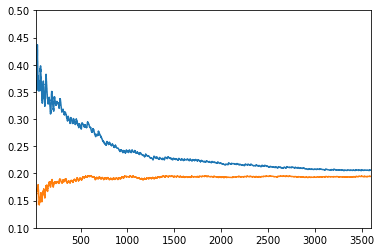

In [20]:
filtername = 'z'
for df in [df_2018, df_2020]:

    fc = np.zeros(df['filter'].values.size)
    fc[np.where(df['filter'].values == filtername)] = 1
    vc = np.arange(df['filter'].values.size)+1
    fc_cum = np.cumsum(fc)
    plt.plot(df['night'].values, fc_cum/vc)

plt.xlim([30, 3600])
plt.ylim([.1,.5])

Text(0.5, 0, 'Day')

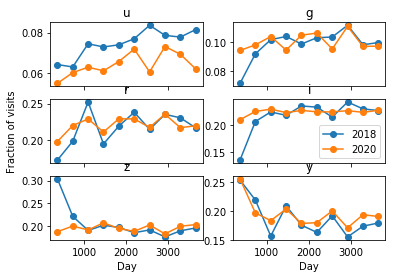

In [35]:
f, axes = plt.subplots(3, 2, sharex=True)
bins = np.arange(0,365.25*10+365.25, 365.25)
labels = ['2018', '2020']

counter = 0
for filtername, ax in zip(filters, axes.ravel()):
    lines = []
    for i,df in enumerate([df_2018, df_2020]):
        fc = np.zeros(df['filter'].values.size)
        fc[np.where(df['filter'].values == filtername)] = 1

        y, be, bi = binned_statistic(df['night'], fc, statistic=np.mean)
        line = ax.plot(bins[1:], y, '-o', label=labels[i])
        lines.append(line)
    counter += 1
    if counter == 4:
        ax.legend()
    ax.set_title(filtername)
axes[1,0].set_ylabel('Fraction of visits')
axes[2,0].set_xlabel('Day')
axes[2,1].set_xlabel('Day')


In [31]:
counter

12

In [23]:
y

BinnedStatisticResult(statistic=array([3.94050091e+09, 1.03249784e+10, 1.99820801e+10, 2.90269458e+10,
       3.61901766e+10, 3.74436530e+10, 5.35386488e+10, 5.73396461e+10,
       5.88496049e+10, 8.20638000e+10]), bin_edges=array([1.0000e+00, 3.6950e+02, 7.3800e+02, 1.1065e+03, 1.4750e+03,
       1.8435e+03, 2.2120e+03, 2.5805e+03, 2.9490e+03, 3.3175e+03,
       3.6860e+03]), binnumber=array([ 1,  1,  1, ..., 10, 10, 10]))

In [25]:

y1_2018 = []
y1_2020 = []

y2_2018 = []
y2_2020 = []


for filtername in filters:
    sql = 'select count(filter) from summaryallprops where filter="%s" and night < 365' % filtername
    n1 = pd.read_sql_query(sql, conn_2018)
    n2 = pd.read_sql_query(sql, conn_2020)
    y1_2018.append(n1.values)
    y1_2020.append(n2.values)
    
    n1 = 365.25*9
    n2= 365.25*10
    sql = 'select count(filter) from summaryallprops where filter="%s" and night > %f and night < %f' % (filtername, n1, n2)
    n1 = pd.read_sql_query(sql, conn_2018)
    n2 = pd.read_sql_query(sql, conn_2020)
    y2_2018.append(n1.values)
    y2_2020.append(n2.values)
y1_2018 = np.array(y1_2018).ravel()
y2_2018 = np.array(y2_2018).ravel()

y1_2020 = np.array(y1_2020).ravel()
y2_2020 = np.array(y2_2020).ravel()

In [26]:
(y1_2018 - y2_2018)/y1_2018

array([-0.42772277, -0.56411513, -0.41041593, -0.88928281,  0.28468676,
        0.2114189 ])

In [27]:
(y1_2020 - y2_2020)/y1_2020

array([-0.15621995, -0.06757305, -0.16598896, -0.16730134, -0.18187676,
        0.17218976])

In [28]:
y1_2018/np.sum(y1_2018), y2_2018/np.sum(y2_2018)

(array([0.06436005, 0.07176508, 0.17307118, 0.13511435, 0.30121996,
        0.25446939]),
 array([0.08206914, 0.10025395, 0.21801761, 0.22799119, 0.1924419 ,
        0.17922621]))

In [29]:
y1_2020/np.sum(y1_2020), y2_2018/np.sum(y2_2020)

(array([0.05529185, 0.09528045, 0.19970612, 0.21070745, 0.18754954,
        0.25146459]),
 array([0.09407747, 0.11492308, 0.24991789, 0.2613508 , 0.22059995,
        0.20545055]))

In [ ]:
# ok, should loop through each year and just find the fraction of observations in each filter